In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data2.csv']))
data.head()

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,negative
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",negative
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,positive
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",positive
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,neutral


In [ ]:
data.head()

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,negative
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",negative
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,positive
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",positive
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,neutral


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8683 entries, 0 to 8682
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Posts       8678 non-null   object
 1   Sentiments  8672 non-null   object
dtypes: object(2)
memory usage: 135.8+ KB


In [ ]:
data['Sentiments'].replace({'negative':0,'positive ':1,'neutral ':1,'positive':1,'negative ':0,'neutral':1,'postive':1,'meg':0,'ne':0,
                          'neu':0,'nef':0, 'neh':0}, inplace=True)
data.head()

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,0.0
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",0.0
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,1.0
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",1.0
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,1.0


In [ ]:
data.Sentiments.unique()

array([0., 1.])

In [ ]:
data=data.dropna()

In [ ]:
data.quality = data.quality.apply(lambda x: x.strip())

In [ ]:
data.Sentiments.value_counts()

1.0    4690
0.0    3980
Name: Sentiments, dtype: int64

## Preprocessing

In [ ]:
%%time
import re
data['texts_prep'] = data.Posts.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])

CPU times: user 78.8 ms, sys: 9.06 ms, total: 87.9 ms
Wall time: 88.1 ms


In [ ]:
data = data[data.texts_prep.apply(lambda x: len(x)) > 0]

In [ ]:
data['target'] = data.quality.map({'bad':0, 'good':1})

In [ ]:
# !pip install bnlp_toolkit

In [ ]:
data.head()

,Posts,Sentiments,texts_prep
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,0.0,"[একদিন, এইরকম, কোনো, দিনে, বিসিএস, বিজিএস, উত্..."
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",0.0,"[ক্লাসমেটের, পড়া, না, পারায়, ফিক, করে, হেসে, দ..."
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,1.0,"[দিনের, পর, দিন, বিভিন্ন, ইংলিশ, টিভি, সিরিজ, ..."
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",1.0,"[স্যার, অসাধারণ, প্রেজেন্টেশন, স্কুল, লাইফে, ফ..."
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,1.0,"[আমি, আমার, ঘন্টার, কর্মঘন্টার, বাইরে, সহজে, ক..."


## Data Partitioning

In [ ]:
X = data['texts_prep']
y = data['Sentiments']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3, random_state=0, stratify=y_val)

print("""Training shape: {}
Validation shape: {}
Testing shape: {}""".format(X_train.shape, X_val.shape, X_test.shape))

Training shape: (6934,)
Validation shape: (1213,)
Testing shape: (521,)


## Load fastText pre-trained model

In [ ]:
!unzip "/content/drive/My Drive/EC/Copy of cc.bn.300.zip" -d /content

Archive:  /content/drive/My Drive/EC/Copy of cc.bn.300.zip
  inflating: /content/cc.bn.300.vec  


In [ ]:
from gensim.models import KeyedVectors

path = '/content/cc.bn.300.vec'
fastText_model = KeyedVectors.load_word2vec_format(path, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Feature Extraction

In [ ]:
def embedding_vectorizer(fastText_model, docs):
    mean_vecs = []
    for instance in docs:
        vecs = []
        for word in instance:
            if word in fastText_model.vocab:
                vecs.append(fastText_model[word])
            else:
                vecs.append(np.zeros(fastText_model.vector_size))
                
        mean_vecs.append(np.mean(vecs, axis=0))
        
    return mean_vecs

In [ ]:
x_train_vectorized = embedding_vectorizer(fastText_model, X_train)
x_train_vectorized = pd.DataFrame(x_train_vectorized).add_prefix('col_')

In [ ]:
x_val_vectorized = embedding_vectorizer(fastText_model, X_val)
x_val_vectorized = pd.DataFrame(x_val_vectorized).add_prefix('col_')

In [ ]:
x_test_vectorized = embedding_vectorizer(fastText_model, X_test)
x_test_vectorized = pd.DataFrame(x_test_vectorized).add_prefix('col_')

## Model

In [ ]:
import tensorflow as tf
import random as rn

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [ ]:
np.random.seed(2)
rn.seed(3)

history = History()

model = Sequential()
model.add(Dense(1024, input_dim=300, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(512, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(512, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(256, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=SGD(0.001), loss="binary_crossentropy", metrics=['accuracy'])

model.fit(np.array(x_train_vectorized), np.array(y_train), 
          validation_data=(np.array(x_val_vectorized), np.array(y_val)), 
          epochs=300, 
          batch_size=3000, 
          shuffle=True, 
          callbacks=[history], 
          verbose=True)

Train on 6934 samples, validate on 1213 samples
Epoch 1/300
6934/6934 [==============================] - 1s 208us/step - loss: 0.6924 - accuracy: 0.5205 - val_loss: 0.6915 - val_accuracy: 0.5260
Epoch 2/300
6934/6934 [==============================] - 1s 163us/step - loss: 0.6924 - accuracy: 0.5063 - val_loss: 0.6914 - val_accuracy: 0.5284
Epoch 3/300
6934/6934 [==============================] - 1s 167us/step - loss: 0.6923 - accuracy: 0.5215 - val_loss: 0.6913 - val_accuracy: 0.5243
Epoch 4/300
6934/6934 [==============================] - 1s 165us/step - loss: 0.6922 - accuracy: 0.5120 - val_loss: 0.6912 - val_accuracy: 0.5202
Epoch 5/300
6934/6934 [==============================] - 1s 164us/step - loss: 0.6923 - accuracy: 0.5108 - val_loss: 0.6910 - val_accuracy: 0.5260
Epoch 6/300
6934/6934 [==============================] - 1s 164us/step - loss: 0.6919 - accuracy: 0.5213 - val_loss: 0.6909 - val_accuracy: 0.5227
Epoch 7/300
6934/6934 [==============================] - 1s 164us/step

In [ ]:
# import pickle
# with open("/content/drive/My Drive/Munna_Research/Experiment/model_1.pkl", 'wb') as out_file:
#   pickle.dump(model, out_file)

In [ ]:
# from sklearn.externals import joblib

# # save the model to disk
# filename = "/content/drive/My Drive/Munna_Research/Experiment/model_1.joblib"
# joblib.dump(model, filename)

In [ ]:
loss, test_accuracy = model.evaluate(np.array(x_test_vectorized), np.array(y_test), verbose=0)

In [ ]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

accuracy_table = pd.DataFrame([round(train_accuracy, 3), round(val_accuracy, 3), round(test_accuracy, 3)], 
             index=['Training', 'Validation', 'Test'], 
             columns=['Accuracy'])
accuracy_table

,Accuracy
Training,0.869
Validation,0.843
Test,0.858


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(np.array(x_test_vectorized))
y_pred = [int(round(i)) for i in y_pred.reshape(-1)]
ac = accuracy_score(y_test.tolist(), y_pred)
print(round(ac, 4))

0.8583


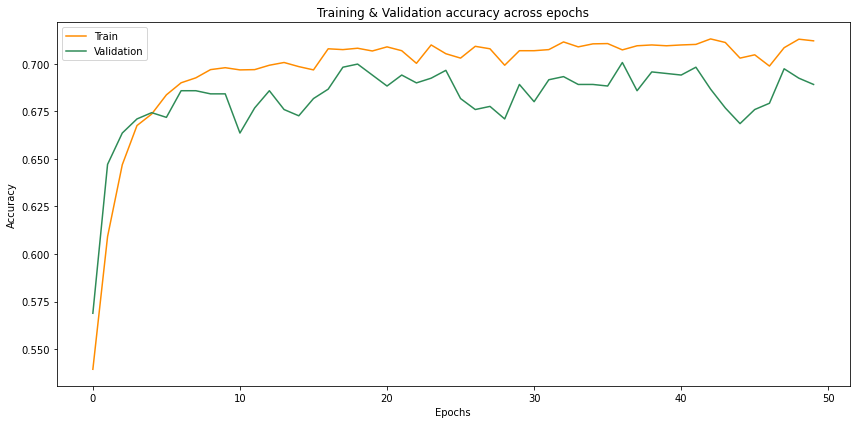

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(history.history['accuracy'][:50],'darkorange')
plt.plot(history.history['val_accuracy'][:50], 'seagreen')
plt.title("Training & Validation accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

# plt.savefig('/content/drive/My Drive/Munna_Research/Experiment/acuracy_vs_epochs.jpg', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.tolist(), y_pred)
print(cm)

p = pd.DataFrame(cm, 
                 index=[['Actual','Actual'],['True', 'False']], 
                 columns=[['Predicted','Predicted'],['True', 'False']])

p.style.set_properties(**{'background-color': 'lightgreen', 
                          'color': 'black'})

[[ 57  20]
 [ 15 155]]
